project

# Automobile Insurance Fraud Prediction 

In [3]:
import numpy as np 
import pandas as pd 

## Loading dataset

In [4]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [5]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.shape

(1000, 40)

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [11]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [12]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [13]:
fraud=df[df['fraud_reported']=='Y']

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

col=['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']


plt.figure(figsize=(16,14))
k=1
for i in col :
    plt.subplot(4,4,k)
    sns.distplot(df[i])
    k=k+1
plt.show()

/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<Figure size 1600x1400 with 10 Axes>

In [15]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [16]:
a=df[df['umbrella_limit'] >0]

/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

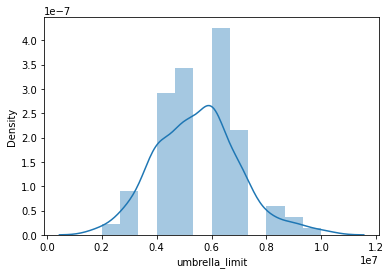

In [17]:
sns.distplot(a['umbrella_limit'])

In [18]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

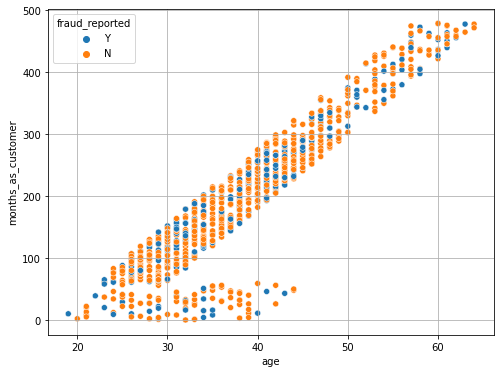

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='months_as_customer',hue='fraud_reported',data=df)
plt.grid(True)
plt.show()

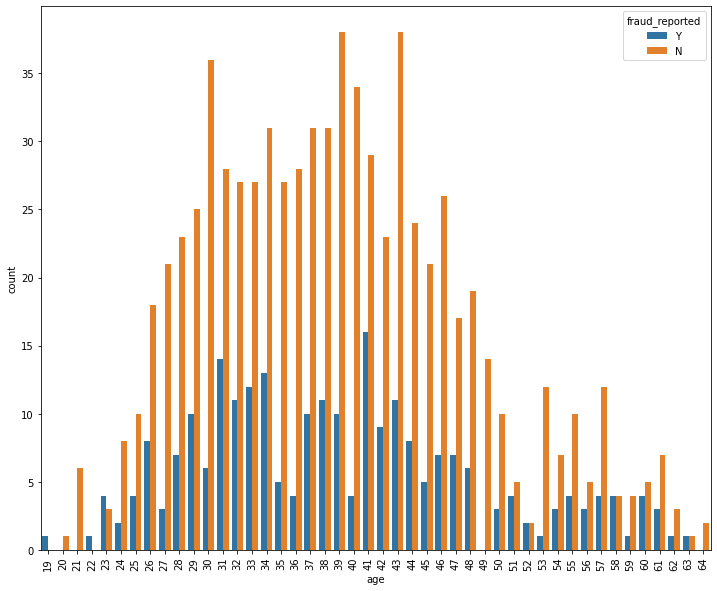

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(x='age',hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In [21]:
a=df[df['fraud_reported'] == 'Y']

a[['policy_number','insured_occupation','insured_education_level','total_claim_amount']].sort_values('total_claim_amount',ascending=False)[:20]

,policy_number,insured_occupation,insured_education_level,total_claim_amount
149,217938,craft-repair,JD,112320
163,346940,prof-specialty,Masters,107900
479,753844,sales,MD,104610
145,515050,exec-managerial,Associate,99320
247,187775,other-service,JD,98670
91,127754,tech-support,Associate,98340
974,291006,transport-moving,JD,98280
23,115399,priv-house-serv,MD,98160
41,616337,transport-moving,Associate,97080
796,728025,machine-op-inspct,Masters,92730


In [22]:
a['insured_education_level'].value_counts()
a['insured_occupation'].value_counts()

exec-managerial      28
craft-repair         22
machine-op-inspct    22
tech-support         22
transport-moving     21
sales                21
prof-specialty       18
armed-forces         17
farming-fishing      16
protective-serv      14
priv-house-serv      12
other-service        12
handlers-cleaners    11
adm-clerical         11
Name: insured_occupation, dtype: int64

/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


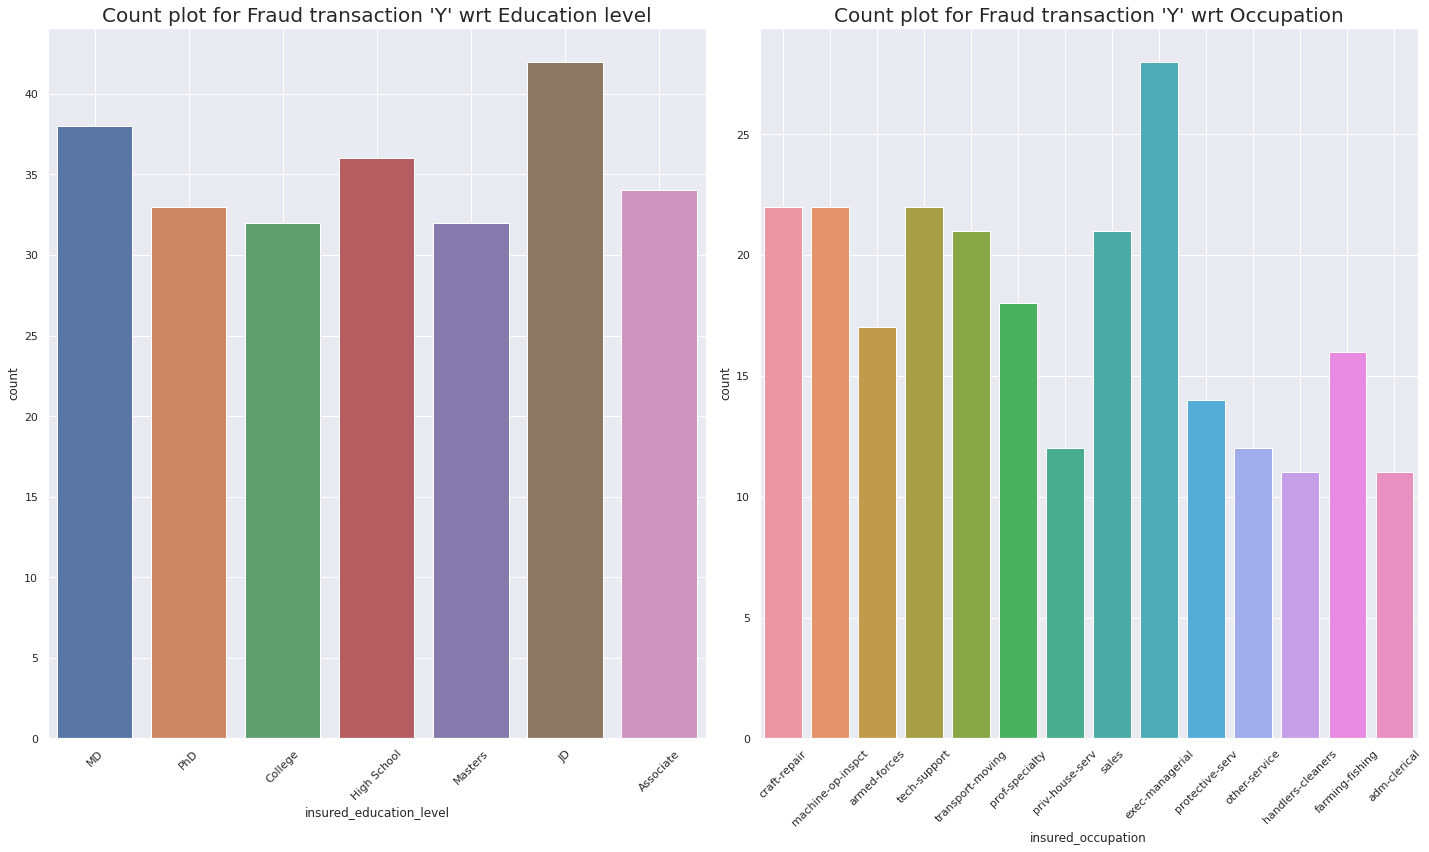

In [23]:
sns.set(style="darkgrid")

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.title("Count plot for Fraud transaction 'Y' wrt Education level",fontsize=20)
sns.countplot('insured_education_level',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Count plot for Fraud transaction 'Y' wrt Occupation",fontsize=20)
sns.countplot('insured_occupation',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
#Looking at below claims
a_claims=pd.pivot_table(a,values='total_claim_amount',index=['insured_occupation','insured_education_level']).sort_values('total_claim_amount',ascending=False)

cm = sns.light_palette("blue", as_cmap=True)
a_claims.style.background_gradient(cmap=cm)

/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


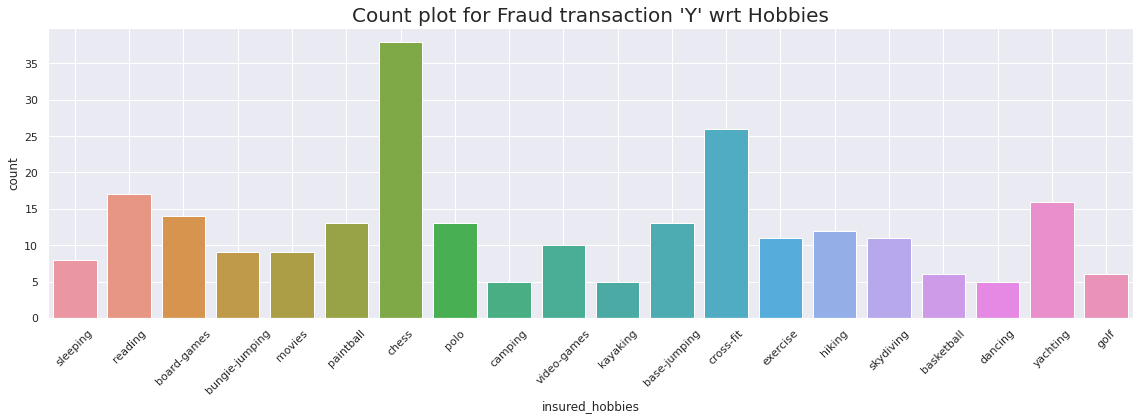

In [25]:
plt.figure(figsize=(16,6))
plt.title("Count plot for Fraud transaction 'Y' wrt Hobbies",fontsize=20)
sns.countplot('insured_hobbies',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

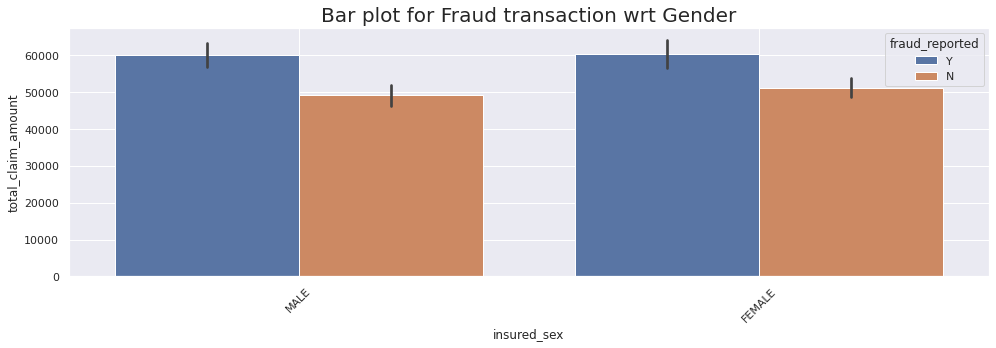

In [26]:
plt.figure(figsize=(14,5))
plt.title("Bar plot for Fraud transaction wrt Gender",fontsize=20)
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
a['insured_relationship'].value_counts()

other-relative    52
not-in-family     45
wife              42
own-child         39
husband           35
unmarried         34
Name: insured_relationship, dtype: int64

In [28]:
profit=df['capital-gains']-df['capital-loss']
df1=df
df1['profit']=profit

In [29]:
df1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'profit'],
      dtype='object')

In [30]:
df[['policy_number','profit']].sort_values('profit',ascending=False)[0:20]

,policy_number,profit
807,250833,192000
533,840806,164100
59,485372,153300
679,774303,151100
353,958785,150600
523,190588,149400
613,831053,148000
846,545506,142500
507,925128,142300
598,507545,141600


In [31]:
df[['incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved']]

,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved
0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1
1,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1
2,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3
3,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1
4,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1
...,...,...,...,...,...,...,...,...,...,...
995,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1
996,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1
997,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3
998,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1


In [32]:
pd.pivot_table(a,values=['number_of_vehicles_involved','total_claim_amount','vehicle_claim','incident_hour_of_the_day'],index=['incident_type','collision_type']).sort_values('vehicle_claim',ascending=False)

incident_hour_of_the_day  \
incident_type            collision_type                              
Single Vehicle Collision Front Collision                 11.595238   
                         Side Collision                  11.787879   
                         Rear Collision                  11.071429   
Multi-vehicle Collision  Side Collision                  11.432432   
                         Front Collision                 11.892857   
                         Rear Collision                  14.142857   
Parked Car               ?                                7.000000   
Vehicle Theft            ?                                5.375000   

                                          number_of_vehicles_involved  \
incident_type            collision_type                                 
Single Vehicle Collision Front Collision                     1.000000   
                         Side Collision                      1.000000   
                         Rear Collision                      1.000000   
Multi-vehicle Collision  Side Collision                      2.972973   
                         Front Collision                     2.964286   
                         Rear Collision                      3.081633   
Parked Car               ?                                   1.000000   
Vehicle Theft            ?                                   1.000000   

                                          total_claim_amount  vehicle_claim  
incident_type            collision_type                                      
Single Vehicle Collision Front Collision        66596.190476   49030.000000  
                         Side Collision         68009.696970   48481.212121  
                         Rear Collision         65782.857143   47616.666667  
Multi-vehicle Collision  Side Collision         62281.621622   45308.648649  
                         Front Collision        60970.000000   43860.000000  
                         Rear Collision         61152.448980   43474.693878  
Parked Car               ?                       5093.750000    3711.250000  
Vehicle Theft            ?                       5197.500000    3665.000000

In [33]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

In [34]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [35]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [36]:
coll=a[['incident_type','collision_type']]

In [37]:
res=coll.loc[coll['collision_type']=='?']

In [38]:
res['incident_type'].value_counts()

Parked Car       8
Vehicle Theft    8
Name: incident_type, dtype: int64

In [39]:
coll_df=df[['incident_type','collision_type']]

In [40]:
res_df=coll_df.loc[coll_df['collision_type']=='?']

In [41]:
res_df['incident_type'].value_counts()

Vehicle Theft    94
Parked Car       84
Name: incident_type, dtype: int64

In [42]:
df['collision_type']=df['collision_type'].replace("?","Not Applicable")

In [43]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Not Applicable     178
Name: collision_type, dtype: int64

In [44]:
a['incident_city'].value_counts()

Arlington      44
Columbus       39
Springfield    38
Hillsdale      35
Northbend      34
Riverwood      30
Northbrook     27
Name: incident_city, dtype: int64

In [45]:
pd.pivot_table(a,values=['total_claim_amount','vehicle_claim'],index=['incident_state','incident_city']).sort_values('total_claim_amount',ascending=False)[:20]

,,total_claim_amount,vehicle_claim
incident_state,incident_city,,
SC,Riverwood,78980.000000,56553.333333
OH,Columbus,78100.000000,54670.000000
NC,Northbrook,76653.333333,55346.666667
WV,Northbrook,75205.000000,53997.500000
SC,Springfield,73116.666667,50267.500000
NY,Northbrook,69730.000000,50758.571429
NC,Springfield,69270.000000,51032.000000
NY,Springfield,67157.000000,47976.000000
OH,Northbrook,66550.000000,46585.000000


In [46]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'profit'],
      dtype='object')

In [47]:
a.loc[(a['property_claim'] == 0.0 )&(a['vehicle_claim'] != 0.0 )]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
60,154,34,598554,14-02-1990,IN,100/300,500,795.23,0,609216,...,?,69480,15440,0,54040,Nissan,Maxima,2014,Y,NaN
155,375,50,120485,18-02-2007,OH,100/300,1000,1275.39,0,466283,...,NO,37280,0,0,37280,Audi,A5,1996,Y,NaN
705,274,45,589094,27-05-2003,IN,250/500,1000,1353.53,0,451467,...,NO,58500,11700,0,46800,Accura,MDX,1995,Y,NaN
803,123,29,379268,05-08-2012,IN,250/500,500,1209.63,0,447188,...,YES,73260,16280,0,56980,Volkswagen,Jetta,2014,Y,NaN
843,297,48,264221,28-07-2014,IL,500/1000,1000,1243.68,0,463331,...,?,54960,6870,0,48090,Toyota,Corolla,2002,Y,NaN
938,147,31,746630,10-02-1997,IN,250/500,500,1054.92,6000000,468232,...,?,68240,8530,0,59710,Toyota,Corolla,2013,Y,NaN


/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


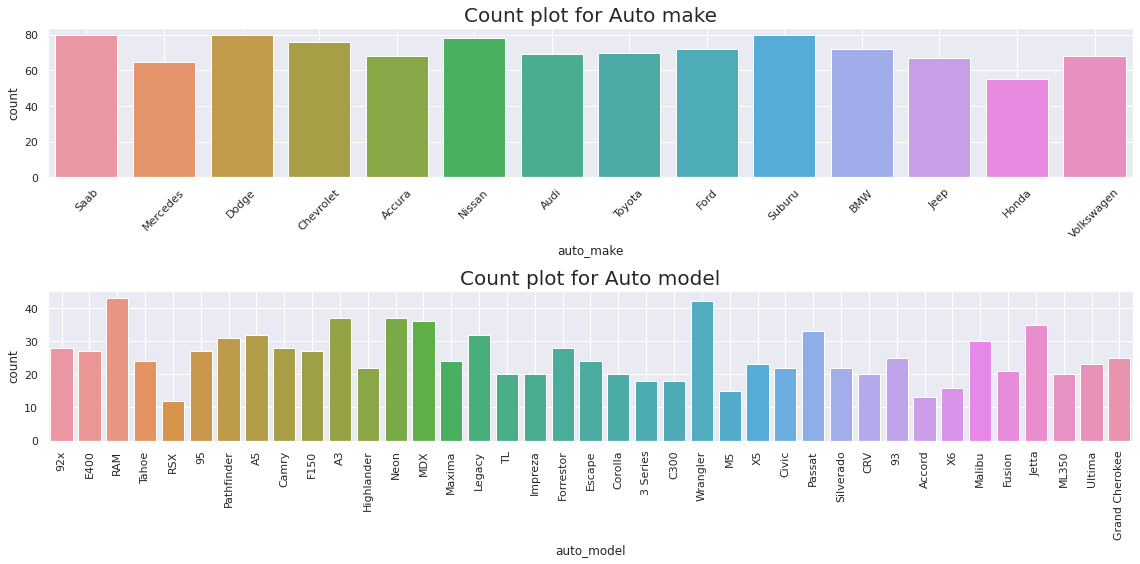

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title("Count plot for Auto make",fontsize=20)
sns.countplot('auto_make',data=df)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.subplot(2,1,2)
plt.title("Count plot for Auto model",fontsize=20)
sns.countplot('auto_model',data=df)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
a['auto_make'].value_counts()

Mercedes      22
Ford          22
Audi          21
Chevrolet     21
BMW           20
Dodge         20
Suburu        19
Volkswagen    19
Saab          18
Honda         14
Nissan        14
Accura        13
Toyota        13
Jeep          11
Name: auto_make, dtype: int64

/home/soma/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


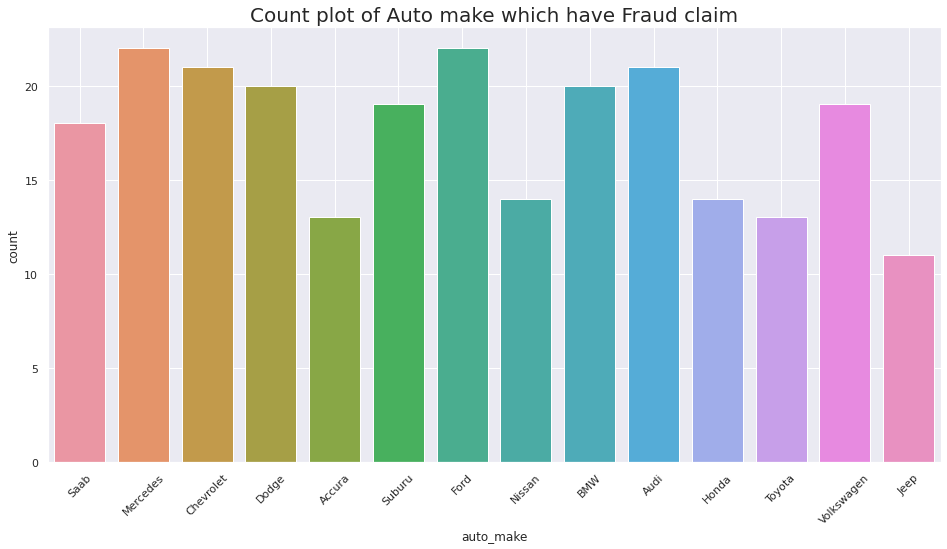

In [50]:
plt.figure(figsize=(16,8))
plt.title("Count plot of Auto make which have Fraud claim",fontsize=20)
sns.countplot('auto_make',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [51]:
pd.pivot_table(a,values=['vehicle_claim'],index=['auto_model','auto_make','policy_number']).sort_values('vehicle_claim',ascending=False)[0:10]

,,,vehicle_claim
auto_model,auto_make,policy_number,
Impreza,Suburu,217938,77760
TL,Accura,515050,76400
Tahoe,Chevrolet,291006,75600
Neon,Dodge,346940,75530
RAM,Dodge,115399,73620
Accord,Honda,127754,71520
Highlander,Toyota,209177,69210
Tahoe,Chevrolet,187775,68310
Escape,Ford,626208,67590


In [52]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'profit'],
      dtype='object')

In [53]:
a['bodily_injuries'].value_counts()

2    90
0    80
1    77
Name: bodily_injuries, dtype: int64

In [54]:
a['police_report_available'].value_counts()

?      89
NO     86
YES    72
Name: police_report_available, dtype: int64

In [55]:
df['police_report_available']=df['police_report_available'].replace("?","Unknown")

In [56]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'profit'],
      dtype='object')

In [57]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,0)

In [58]:
df2=df

In [59]:
df2=df2.drop(['policy_number','policy_bind_date','_c39','insured_zip','incident_date','authorities_contacted','profit','auto_make','auto_model'],axis=1)

In [60]:
df2.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported'],
      dtype='object')

In [61]:
df2=pd.get_dummies(df2,columns=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state',
                                'incident_city','incident_location','property_damage','police_report_available'],drop_first=True)

In [62]:
df2.shape

(1000, 1089)

In [63]:
df2.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       ...
       'incident_location_9918 Andromedia Drive',
       'incident_location_9929 Rock Drive', 'incident_location_9935 4th Drive',
       'incident_location_9942 Tree Ave', 'incident_location_9980 Lincoln Ave',
       'incident_location_9988 Rock Ridge', 'property_damage_NO',
       'property_damage_YES', 'police_report_available_Unknown',
       'police_report_available_YES'],
      dtype='object', length=1089)

In [64]:
x=df2.drop(['fraud_reported'],axis=1)

In [65]:
y=df2['fraud_reported']

## Model Building

In [66]:
from imblearn.over_sampling import SMOTE

x_upsample, y_upsample  = SMOTE().fit_resample(x, y)

print(x_upsample.shape)
print(y_upsample.shape)

/home/soma/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


(1506, 1088)
(1506,)


In [67]:
y_upsample.value_counts()

Y    753
N    753
Name: fraud_reported, dtype: int64

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [69]:
x_scale=sc.fit_transform(x_upsample)

In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_scaled=pca.fit_transform(x_scale)

In [71]:
r=pca.explained_variance_ratio_

In [72]:
np.sum(r)

0.9504266875478465

In [73]:
len(r)

950

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_upsample,test_size=0.3)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf=RandomForestClassifier()

In [77]:
#Hyperparamenter tuning
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'], 'max_depth': np.arange(1,30)}

In [78]:
grid=GridSearchCV(rf,parameters)

In [79]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [80]:
model=grid.best_estimator_

In [81]:
grid.best_score_

0.8358654931166779

In [82]:
y_pred=model.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8407079646017699

<AxesSubplot:>

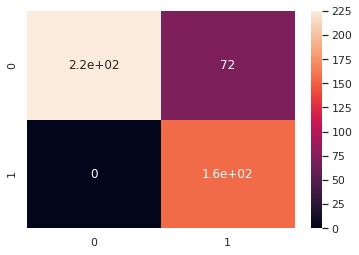

In [84]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [85]:
clf=classification_report(y_pred,y_test)
print(clf)

              precision    recall  f1-score   support

           N       1.00      0.76      0.86       297
           Y       0.68      1.00      0.81       155

    accuracy                           0.84       452
   macro avg       0.84      0.88      0.84       452
weighted avg       0.89      0.84      0.84       452



In [86]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(model,x_train,y_train,cv=10)

In [87]:
print(cross_val)

[0.86792453 0.79245283 0.85849057 0.85849057 0.78095238 0.82857143
 0.83809524 0.83809524 0.85714286 0.80952381]


In [90]:
print("Acccuracy of the model is :", np.mean(cross_val)*100)

Acccuracy of the model is : 83.29739442946989
